In [305]:
import numpy as np
import pandas as pd
from datetime import datetime
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [199]:
Walmart_dataframe = pd.read_csv("C:/Users/BEST USER/Downloads/Walmart_Store_sales.csv")
Walmart_dataframe.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
Walmart_dataframe.shape

(6435, 8)

In [4]:
Walmart_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
Walmart_dataframe.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
Walmart_dataframe.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# Question 1: Store with maximum weekly sales

In [7]:
max_sales = Walmart_dataframe[["Store","Weekly_Sales"]]
max_sales.head()

,Store,Weekly_Sales
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68


In [8]:
max_sales.sort_values('Weekly_Sales', ascending=False).drop_duplicates(['Store']).head()

,Store,Weekly_Sales
1905,14,3818686.45
2763,20,3766687.43
1333,10,3749057.69
527,4,3676388.98
1762,13,3595903.20


### Answer: Store 14 has the maximum weekly sales

# Question 2: STORE WITH MAXIMUM STANDARD DEVIATION

In [9]:
Max_std = Walmart_dataframe[['Store','Weekly_Sales']]
Max_std

,Store,Weekly_Sales
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68
...,...,...
6430,45,713173.95
6431,45,733455.07
6432,45,734464.36
6433,45,718125.53


In [10]:
Max_std.groupby("Store").std().sort_values(by=["Weekly_Sales"], ascending = False)

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776
23,249788.038068
27,239930.135688
2,237683.694682
39,217466.454833


#Store 14 has the maximum standard deviation

### TO FIND THE COFFICIENT OF MEAN TO STANDARD DEVIATION

In [11]:
mean = Max_std.groupby(['Store'])['Weekly_Sales'].mean()
std = Max_std.groupby(['Store'])['Weekly_Sales'].std()
def standardize_sales(max_sales):
    return(mean())/std
Max_std.sort_values("Weekly_Sales", ascending =False)

,Store,Weekly_Sales
1905,14,3818686.45
2763,20,3766687.43
1333,10,3749057.69
527,4,3676388.98
1762,13,3595903.20
...,...,...
4671,33,220060.35
4623,33,219804.85
4675,33,215359.21
4614,33,213538.32


### ANSWER: Store 14 has a high coefficient of mean to standard deviation

# Question 3: STORE WITH GOOD QUARTERLY GROWTH RATE IN Q'3 2012

In [200]:
 Walmart_dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [13]:
Walmart_dataframe.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [201]:
Walmart_dataframe['Date'] = pd.to_datetime(Walmart_dataframe['Date'], format='%d-%m-%Y', exact=False)
Walmart_dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [15]:
Walmart_dataframe.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

#### Add column with year, month and day Tto walmart dataset

In [202]:
Walmart_dataframe['Year'] = pd.DatetimeIndex(Walmart_dataframe['Date']).year

Walmart_dataframe['Month'] = pd.DatetimeIndex(Walmart_dataframe['Date']).month

Walmart_dataframe['Month_Name'] = pd.DatetimeIndex(Walmart_dataframe['Date']).month_name()

Walmart_dataframe['Day'] = pd.DatetimeIndex(Walmart_dataframe['Date']).day
Walmart_dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,September,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,October,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,October,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,October,19


###  Extracting Wallmart sales  for the year 2012

In [17]:
Walmart_2012 = Walmart_dataframe.loc[Walmart_dataframe["Year"]==2012]

### Extracting data for third quarter of 2012

#### The months for third quarter - September, October, November and December

In [18]:
Third_quarter2012 = Walmart_2012[(Walmart_2012['Month'] > 7) & (Walmart_2012 ['Month'] <= 12)]
Third_quarter2012

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908,2012,8,August,3
131,1,2012-08-10,1592409.97,0,85.05,3.494,221.958433,6.908,2012,8,August,10
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908,2012,8,August,17
133,1,2012-08-24,1494122.38,0,77.66,3.620,222.171946,6.908,2012,8,August,24
134,1,2012-08-31,1582083.40,0,80.49,3.638,222.305481,6.908,2012,8,August,31
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,September,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,October,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,October,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,October,19


### To find the mean sales in the third quarter

In [19]:
mean_sales_thirdquater2012 = Third_quarter2012.groupby(['Store'])['Weekly_Sales'].mean()
mean_sales_thirdquater2012

Store
1     1.558891e+06
2     1.879669e+06
3     4.101801e+05
4     2.141353e+06
5     3.215110e+05
6     1.497008e+06
7     5.701189e+05
8     9.147021e+05
9     5.502954e+05
10    1.748474e+06
11    1.329646e+06
12    9.656139e+05
13    2.027708e+06
14    1.643850e+06
15    5.706604e+05
16    5.247850e+05
17    9.517725e+05
18    1.053168e+06
19    1.397089e+06
20    2.073649e+06
21    6.860652e+05
22    9.957438e+05
23    1.430391e+06
24    1.355368e+06
25    6.975495e+05
26    1.032696e+06
27    1.669855e+06
28    1.241656e+06
29    5.140060e+05
30    4.340571e+05
31    1.366282e+06
32    1.194397e+06
33    2.643020e+05
34    9.609732e+05
35    8.689271e+05
36    2.908513e+05
37    5.260747e+05
38    4.316451e+05
39    1.594652e+06
40    9.752782e+05
41    1.389653e+06
42    5.588456e+05
43    6.178327e+05
44    3.398966e+05
45    7.296255e+05
Name: Weekly_Sales, dtype: float64

In [20]:
mean_sales_thirdquater2012.sort_values(ascending= False)

Store
4     2.141353e+06
20    2.073649e+06
13    2.027708e+06
2     1.879669e+06
10    1.748474e+06
27    1.669855e+06
14    1.643850e+06
39    1.594652e+06
1     1.558891e+06
6     1.497008e+06
23    1.430391e+06
19    1.397089e+06
41    1.389653e+06
31    1.366282e+06
24    1.355368e+06
11    1.329646e+06
28    1.241656e+06
32    1.194397e+06
18    1.053168e+06
26    1.032696e+06
22    9.957438e+05
40    9.752782e+05
12    9.656139e+05
34    9.609732e+05
17    9.517725e+05
8     9.147021e+05
35    8.689271e+05
45    7.296255e+05
25    6.975495e+05
21    6.860652e+05
43    6.178327e+05
15    5.706604e+05
7     5.701189e+05
42    5.588456e+05
9     5.502954e+05
37    5.260747e+05
16    5.247850e+05
29    5.140060e+05
30    4.340571e+05
38    4.316451e+05
3     4.101801e+05
44    3.398966e+05
5     3.215110e+05
36    2.908513e+05
33    2.643020e+05
Name: Weekly_Sales, dtype: float64

## Answer: In the Q'3 of 2012, Store 4 had a good quarterly growth

# Question: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [203]:
Walmart_dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,September,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,October,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,October,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,October,19


In [204]:
holiday_week = Walmart_dataframe[Walmart_dataframe["Holiday_Flag"]==1]
holiday_week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,12
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,September,10
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,November,26
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,December,31
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,February,11
...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9,September,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11,November,25
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12,December,30
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2012,2,February,10


In [23]:
non_holiday_week = Walmart_dataframe[Walmart_dataframe["Holiday_Flag"]==0]
non_holiday_week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,5
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,5
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,March,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,September,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,October,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,October,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,October,19


### Mean sales of non holiday for all stores

In [24]:
non_holiday_mean = non_holiday_week["Weekly_Sales"].mean()
non_holiday_mean

1041256.3802088564

### Group holidays  by month for all stores

In [25]:
hol_month = holiday_week.groupby(['Month_Name'])['Weekly_Sales'].sum()
hol_month = pd.DataFrame(hol_month)
hol_month

,Weekly_Sales
Month_Name,
December,8.647498e+07
February,1.456823e+08
November,1.324146e+08
September,1.407277e+08


### Holidays with sales higher than the mean sales of non holiday

In [26]:
hol_high_sales = hol_month > non_holiday_mean 
hol_high_sales

,Weekly_Sales
Month_Name,
December,True
February,True
November,True
September,True


##  Answer: All the holidays have higher mean sales of all the non holiday all for the stores

# Question4: Provide a monthly and semester view of sales in units and give insights

In [227]:
Walmart_dataframe.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,5


In [299]:
Monthly_Sales = Walmart_dataframe[['Month',"Month_Name","Weekly_Sales"]]
Monthly_Sales

,Month,Month_Name,Weekly_Sales
0,2,February,1643690.90
1,2,February,1641957.44
2,2,February,1611968.17
3,2,February,1409727.59
4,3,March,1554806.68
...,...,...,...
6430,9,September,713173.95
6431,10,October,733455.07
6432,10,October,734464.36
6433,10,October,718125.53


In [300]:
Monthly_Sales=np.round(Monthly_Sales.groupby(['Month','Month_Name'])['Weekly_Sales'].sum(),0)
Monthly_Sales

Month  Month_Name
1      January       332598438.0
2      February      568727890.0
3      March         592785901.0
4      April         646859785.0
5      May           557125572.0
6      June          622629887.0
7      July          650000977.0
8      August        613090209.0
9      September     578761179.0
10     October       584784788.0
11     November      413015725.0
12     December      576838635.0
Name: Weekly_Sales, dtype: float64

In [301]:
Monthly_Sales = pd.DataFrame(Monthly_Sales)
Monthly_Sales.reset_index(inplace=True)
Monthly_Sales

,Month,Month_Name,Weekly_Sales
0,1,January,332598438.0
1,2,February,568727890.0
2,3,March,592785901.0
3,4,April,646859785.0
4,5,May,557125572.0
5,6,June,622629887.0
6,7,July,650000977.0
7,8,August,613090209.0
8,9,September,578761179.0
9,10,October,584784788.0


### Visualizing

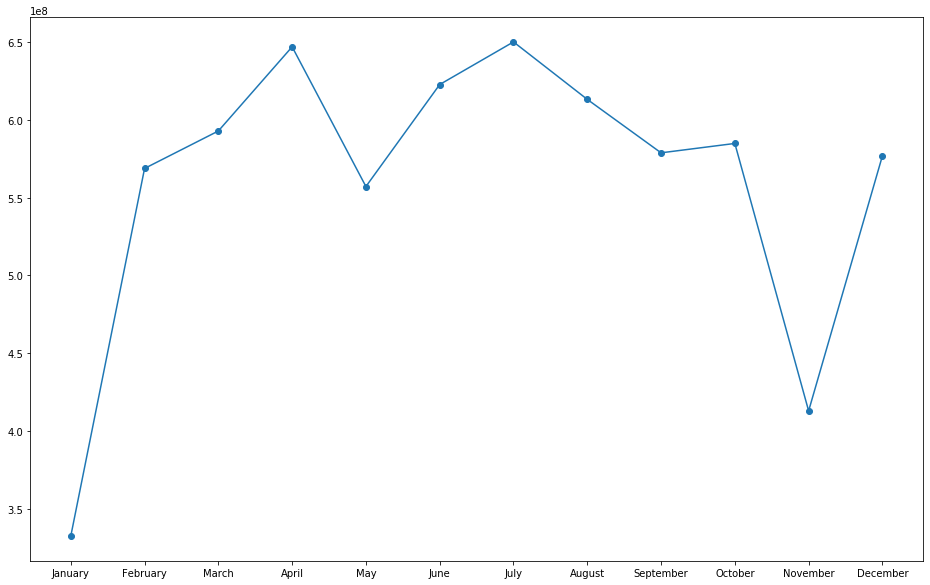

In [302]:
plt.figure(figsize=[16,10])
plt.plot('Month_Name','Weekly_Sales', data = Monthly_Sales, marker ='o')

# Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [166]:
Walmart_dataframe.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [167]:
new_data = Walmart_dataframe[Walmart_dataframe['Store'] ==1][['CPI', "Unemployment", "Fuel_Price", 'Weekly_Sales']]
new_data.head()

,CPI,Unemployment,Fuel_Price,Weekly_Sales
0,211.096358,8.106,2.572,1643690.90
1,211.242170,8.106,2.548,1641957.44
2,211.289143,8.106,2.514,1611968.17
3,211.319643,8.106,2.561,1409727.59
4,211.350143,8.106,2.625,1554806.68


In [168]:
new_data.shape

(143, 4)

### Visualizing the CPI, Unemploymet, and Fuel Price with  weekly sales

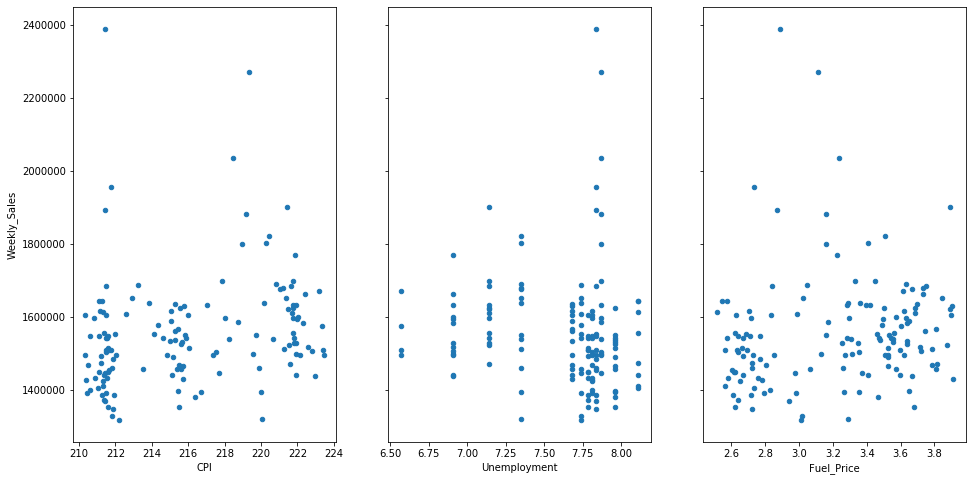

In [171]:
fig,axs= plt.subplots(1,3, sharey=True)
new_data.plot(kind= 'scatter', x = 'CPI', y= 'Weekly_Sales', ax=axs[0],figsize = (16,8))
new_data.plot(kind= 'scatter', x = "Unemployment", y= 'Weekly_Sales', ax=axs[1])
new_data.plot(kind= 'scatter', x = "Fuel_Price", y= 'Weekly_Sales', ax=axs[2])

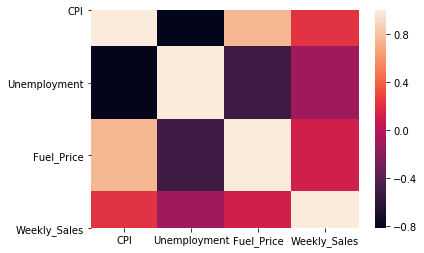

In [191]:
sns.heatmap(new_data.corr())

### applying linear regression analysis

In [172]:
x_features = new_data.iloc[:,:3]
x_features.head()

,CPI,Unemployment,Fuel_Price
0,211.096358,8.106,2.572
1,211.242170,8.106,2.548
2,211.289143,8.106,2.514
3,211.319643,8.106,2.561
4,211.350143,8.106,2.625


In [173]:
y_target = new_data.iloc[:,3:]
y_target.head()

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [165]:
#import the linear regression model - esstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

### Training and spliting the data

In [182]:
X_train,X_test,Y__train,Y_test = train_test_split(x_features,y_target,test_size=0.3, random_state =42)

## Initializing the model and fitting it

In [180]:
lm = LinearRegression()
lm.fit(x_features, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
print(x_features.shape, y_target.shape)

(143, 3) (143, 1)


### finding the intercept and coefficent

In [176]:
print(lm.intercept_)
print(lm.coef_)

[-3887095.77234398]
[[ 21791.71895906 124063.65641864 -64838.31315855]]


### Intializing and fittting the splitted the training data

In [184]:
lm = LinearRegression()
lm.fit(X_train,Y__train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
print(lm.intercept_)
print(lm.coef_)

prediction = lm.predict(X_test)
print(sqrt(mean_squared_error(Y_test,prediction)))

[689641.39047135]
[[  4809.35638897 -23661.16218287  -5089.54972152]]
194201.09014634558


### Statistical Model

In [189]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'Weekly_Sales~CPI + Unemployment + Fuel_Price', data = new_data).fit()
lm.conf_int()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.303
Date:                Sun, 05 Jul 2020   Prob (F-statistic):            0.00616
Time:                        18:08:30   Log-Likelihood:                -1906.0
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     139   BIC:                             3832.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.887e+06   1.74e+06     -2.234      0.027   -7.33e+06   -4.46e+05
CPI           2.179e+04   6785.272      3.212      0.002    8376.030    3.52e+04
Unemployment  1.241e+05   5.88e+04      2.111      0.037    7846.506     2.4e+05
Fuel_Price   -6.484e+04   4.68e+04     -1.384      0.169   -1.57e+05    2.78e+04
==============================================================================
Omnibus:                       93.038   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              655.590
Skew:                           2.267   Prob(JB):                    4.37e-143
Kurtosis:                      12.459   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary from the statistical model


1. We reject the Null hypothesis for the Fuel Prize as it is greater than the p values
2. Therefore, CPI and Unemployment are both postively associated with sales while Fuel price is negatively associated with sales

3. The R squared value for this model a very low  and which means this model doesnt provide a better fit to the data



## Linear Regression 2 - Change dates into days by creating new variable.

In [69]:
Walmart_dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,September,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,October,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,October,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,October,19


In [71]:
Walmart_dataframe['Day'] = pd.to_datetime(Walmart_dataframe['Date']).dt.day_name()
Walmart_dataframe.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Month_Name,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,February,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,February,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,February,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,February,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,March,Friday


In [320]:
df.to_csv("C:/Users/BEST USER/Downloads/Walmart_Store_sales.csv")